In [19]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(grid=False, figsize=(10,10))

In [4]:
df = pd.read_csv('anonymized-curriculum-access.txt',sep=' ',header=None)
df.head()

0         1                                    2  3     4  \
0  2018-01-26  09:55:03                                    /  1   8.0   
1  2018-01-26  09:56:02                              java-ii  1   8.0   
2  2018-01-26  09:56:05  java-ii/object-oriented-programming  1   8.0   
3  2018-01-26  09:56:06   slides/object_oriented_programming  1   8.0   
4  2018-01-26  09:56:24            javascript-i/conditionals  2  22.0   

              5  
0  97.105.19.61  
1  97.105.19.61  
2  97.105.19.61  
3  97.105.19.61  
4  97.105.19.61

In [7]:
df['timestamp'] = df[0] +' '+ df[1]
df

0         1  \
0       2018-01-26  09:55:03   
1       2018-01-26  09:56:02   
2       2018-01-26  09:56:05   
3       2018-01-26  09:56:06   
4       2018-01-26  09:56:24   
...            ...       ...   
900218  2021-04-21  16:41:51   
900219  2021-04-21  16:42:02   
900220  2021-04-21  16:42:09   
900221  2021-04-21  16:44:37   
900222  2021-04-21  16:44:39   

                                                       2    3     4  \
0                                                      /    1   8.0   
1                                                java-ii    1   8.0   
2                    java-ii/object-oriented-programming    1   8.0   
3                     slides/object_oriented_programming    1   8.0   
4                              javascript-i/conditionals    2  22.0   
...                                                  ...  ...   ...   
900218                              jquery/personal-site   64  28.0   
900219                                 jquery/mapbox-api   64  28.0   
900220                           jquery/ajax/weather-map   64  28.0   
900221  anomaly-detection/discrete-probabilistic-methods  744  28.0   
900222                                 jquery/mapbox-api   64  28.0   

                    5            timestamp  
0        97.105.19.61  2018-01-26 09:55:03  
1        97.105.19.61  2018-01-26 09:56:02  
2        97.105.19.61  2018-01-26 09:56:05  
3        97.105.19.61  2018-01-26 09:56:06  
4        97.105.19.61  2018-01-26 09:56:24  
...               ...                  ...  
900218  71.150.217.33  2021-04-21 16:41:51  
900219  71.150.217.33  2021-04-21 16:42:02  
900220  71.150.217.33  2021-04-21 16:42:09  
900221  24.160.137.86  2021-04-21 16:44:37  
900222  71.150.217.33  2021-04-21 16:44:39  

[900223 rows x 7 columns]

In [8]:
df.drop(columns=[0,1],inplace=True)

In [9]:
df.head()

2  3     4             5  \
0                                    /  1   8.0  97.105.19.61   
1                              java-ii  1   8.0  97.105.19.61   
2  java-ii/object-oriented-programming  1   8.0  97.105.19.61   
3   slides/object_oriented_programming  1   8.0  97.105.19.61   
4            javascript-i/conditionals  2  22.0  97.105.19.61   

             timestamp  
0  2018-01-26 09:55:03  
1  2018-01-26 09:56:02  
2  2018-01-26 09:56:05  
3  2018-01-26 09:56:06  
4  2018-01-26 09:56:24

In [10]:
df.columns.tolist()

[2, 3, 4, 5, 'timestamp']

In [11]:
df.columns = ['page', 'num1', 'num2', 'ip', 'timestamp']

In [12]:
df.head()

page  num1  num2            ip  \
0                                    /     1   8.0  97.105.19.61   
1                              java-ii     1   8.0  97.105.19.61   
2  java-ii/object-oriented-programming     1   8.0  97.105.19.61   
3   slides/object_oriented_programming     1   8.0  97.105.19.61   
4            javascript-i/conditionals     2  22.0  97.105.19.61   

             timestamp  
0  2018-01-26 09:55:03  
1  2018-01-26 09:56:02  
2  2018-01-26 09:56:05  
3  2018-01-26 09:56:06  
4  2018-01-26 09:56:24

In [14]:
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')
df.head(1)

page  num1  num2            ip
timestamp                                         
2018-01-26 09:55:03    /     1   8.0  97.105.19.61

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   page    900222 non-null  object 
 1   num1    900223 non-null  int64  
 2   num2    847330 non-null  float64
 3   ip      900223 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ MB


In [17]:
df.ip.nunique()

5531

array([[<AxesSubplot:title={'center':'num1'}>,
        <AxesSubplot:title={'center':'num2'}>]], dtype=object)

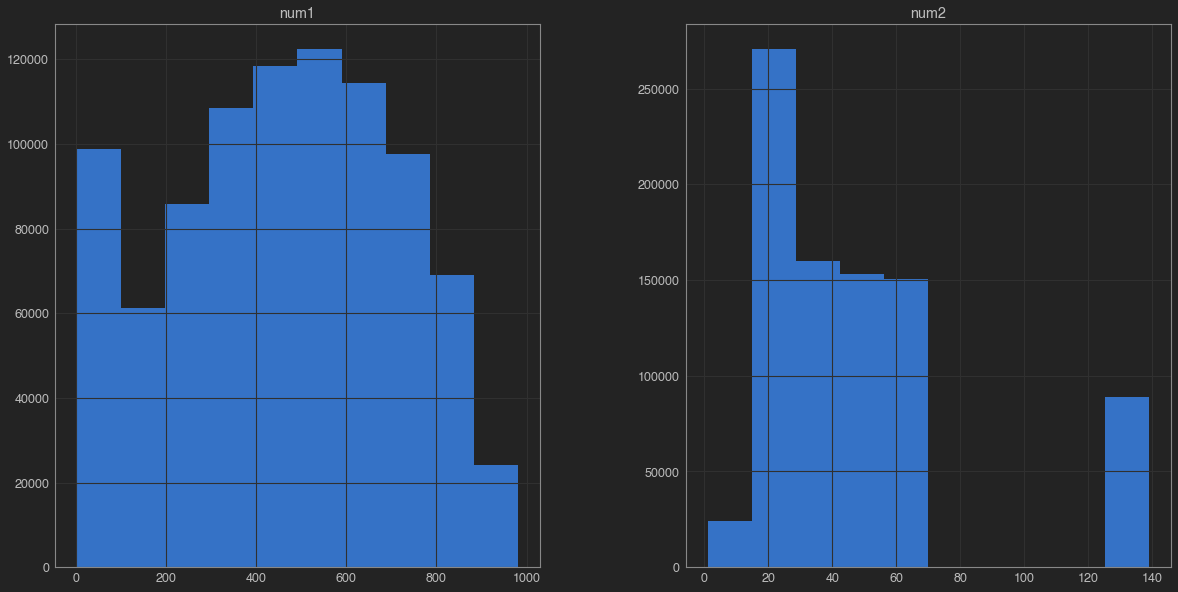

In [23]:
df.hist(figsize=(20,10))

In [35]:
df.page.value_counts()

/                           50313
search/search_index.json    19519
javascript-i                18983
toc                         18297
java-iii                    13733
                            ...  
bayes-capstones                 1
itc-ml                          1
2.0_Intro_Stats                 1
10_Projects                     1
codeup-exercises                1
Name: page, Length: 2313, dtype: int64

In [25]:
df.num2.nunique()

47

In [26]:
df.num1.nunique()

981

In [36]:
df.head(100)

page  num1  \
timestamp                                                                      
2018-01-26 09:55:03                                                  /     1   
2018-01-26 09:56:02                                            java-ii     1   
2018-01-26 09:56:05                java-ii/object-oriented-programming     1   
2018-01-26 09:56:06                 slides/object_oriented_programming     1   
2018-01-26 09:56:24                          javascript-i/conditionals     2   
2018-01-26 09:56:41                                 javascript-i/loops     2   
2018-01-26 09:56:46                          javascript-i/conditionals     3   
2018-01-26 09:56:48                             javascript-i/functions     3   
2018-01-26 09:56:59                                 javascript-i/loops     2   
2018-01-26 09:58:26                             javascript-i/functions     4   
2018-01-26 09:59:22                           mkdocs/search_index.json     5   
2018-01-26 10:00:02  javascript-i/introduction/working-with-data-ty...     6   
2018-01-26 10:00:37                                                  /     6   
2018-01-26 10:00:39                                       javascript-i     6   
2018-01-26 10:00:44  javascript-i/introduction/working-with-data-ty...     6   
2018-01-26 10:00:49                javascript-i/introduction/variables     6   
2018-01-26 10:00:57                javascript-i/introduction/operators     6   
2018-01-26 10:01:12  javascript-i/introduction/working-with-data-ty...     6   
2018-01-26 10:02:02                             javascript-i/functions     7   
2018-01-26 10:02:21                             javascript-i/functions     8   
2018-01-26 10:02:42                             javascript-i/functions     9   
2018-01-26 10:05:26                          javascript-i/conditionals     7   
2018-01-26 10:05:36                             javascript-i/functions     7   
2018-01-26 10:08:22                           mkdocs/search_index.json    10   
2018-01-26 10:08:34                            git/merge-conflict-demo    10   
2018-01-26 10:08:45                           mkdocs/search_index.json    10   
2018-01-26 10:08:55                               git/working-in-teams    10   
2018-01-26 10:09:15          javascript-i/introduction/primitive-types     4   
2018-01-26 10:09:24                javascript-i/introduction/operators     4   
2018-01-26 10:10:16                             javascript-i/functions     3   
2018-01-26 10:14:47                                                  /    11   
2018-01-26 10:14:51                                       javascript-i    11   
2018-01-26 10:14:53                                                  /     6   
2018-01-26 10:15:02                             javascript-i/functions    11   
2018-01-26 10:15:23                                       javascript-i     6   
2018-01-26 10:15:26                  javascript-i/javascript-with-html     6   
2018-01-26 10:15:28  javascript-i/introduction/working-with-data-ty...     6   
2018-01-26 10:17:14                  javascript-i/javascript-with-html     6   
2018-01-26 10:17:16                             javascript-i/functions     6   
2018-01-26 10:18:22                                                  /    10   
2018-01-26 10:18:24                                             spring    10   
2018-01-26 10:33:18                                       javascript-i    12   
2018-01-26 10:33:22                  javascript-i/javascript-with-html    12   
2018-01-26 10:33:24                             javascript-i/functions    12   
2018-01-26 10:33:25                             javascript-i/functions    13   
2018-01-26 10:34:57                             javascript-i/functions     6   
2018-01-26 10:35:00                             javascript-i/functions     6   
2018-01-26 10:35:08  javascript-i/introduction/working-with-data-ty...    14   
2018-01-26 10:35:12                  javascript-i/javascript-with-

In [37]:
df.groupby('ip').num2.sum()

ip
100.11.170.135      6612.0
100.19.73.35       23664.0
100.35.67.162        231.0
103.137.12.164       306.0
103.208.220.130        0.0
                    ...   
99.97.210.12        1008.0
99.98.245.245         56.0
99.98.32.165        7743.0
99.98.32.97         1564.0
99.98.36.168       10557.0
Name: num2, Length: 5531, dtype: float64

In [38]:
df.page.nunique()

2313

In [43]:
df[df.num2 > 80]

page  num1   num2  \
timestamp                                                                 
2020-11-03 09:06:55                                      /   788  132.0   
2020-11-03 09:07:00                               html-css   788  132.0   
2020-11-03 09:07:05                  html-css/introduction   788  132.0   
2020-11-03 09:07:06                                      /   789  132.0   
2020-11-03 09:07:15                           javascript-i   788  132.0   
...                                                    ...   ...    ...   
2021-04-21 16:36:09                   jquery/personal-site   869  135.0   
2021-04-21 16:36:34  html-css/css-ii/bootstrap-grid-system   948  138.0   
2021-04-21 16:37:48                               java-iii   834  134.0   
2021-04-21 16:38:14                      java-iii/servlets   834  134.0   
2021-04-21 16:41:51           javascript-i/bom-and-dom/dom   875  135.0   

                                  ip  
timestamp                             
2020-11-03 09:06:55  173.175.108.125  
2020-11-03 09:07:00  173.175.108.125  
2020-11-03 09:07:05  173.175.108.125  
2020-11-03 09:07:06    130.45.76.131  
2020-11-03 09:07:15  173.175.108.125  
...                              ...  
2021-04-21 16:36:09     136.50.98.51  
2021-04-21 16:36:34   104.48.214.211  
2021-04-21 16:37:48      67.11.50.23  
2021-04-21 16:38:14      67.11.50.23  
2021-04-21 16:41:51   24.242.150.231  

[88936 rows x 4 columns]

In [40]:
df.num2.nlargest()

timestamp
2021-04-12 16:44:17    139.0
2021-04-12 16:44:17    139.0
2021-04-12 16:44:18    139.0
2021-04-12 16:44:18    139.0
2021-04-12 16:44:18    139.0
Name: num2, dtype: float64

In [41]:
df.num2.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: num2, dtype: int64

In [44]:
instructors = df[df.num2.isna()]
instructors.head()

page  num1  num2  \
timestamp                                                                
2018-01-26 16:46:16                                      /    48   NaN   
2018-01-26 16:46:24  spring/extra-features/form-validation    48   NaN   
2018-01-26 17:54:24                                      /    48   NaN   
2018-01-26 18:32:03                                      /    48   NaN   
2018-01-26 18:32:17              mysql/relationships/joins    48   NaN   

                               ip  
timestamp                          
2018-01-26 16:46:16  97.105.19.61  
2018-01-26 16:46:24  97.105.19.61  
2018-01-26 17:54:24  97.105.19.61  
2018-01-26 18:32:03  97.105.19.61  
2018-01-26 18:32:17  97.105.19.61

In [45]:
instructors.ip.nunique()

413

In [46]:
instructors.num1.nunique()

78

In [47]:
instructors.page.value_counts()

/                                                4459
search/search_index.json                         1985
javascript-i                                      780
toc                                               706
spring                                            641
                                                 ... 
2-stats/4.7-correlation                             1
regression/acquire-and-prep                         1
content/laravel/quickstart/basic-routing.html       1
Classification_LogisticRegression.md                1
10.04.05_TopicModeling                              1
Name: page, Length: 1112, dtype: int64

In [50]:
ip_list = instructors.ip.unique().tolist()

In [51]:
from ip2geotools.databases.noncommercial import DbIpCity

In [52]:
geo = [(DbIpCity.get(ip, api_key='free')).to_csv(',') for ip in ip_list]
geo

['97.105.19.61,San Antonio (Downtown),Texas,US,29.4193459,-98.4780456',
 '24.160.159.122,Brownsville,Texas,US,25.9140256,-97.4890856',
 '66.69.62.219,San Antonio,Texas,US,29.4246002,-98.4951405',
 '24.153.137.59,San Antonio (Northwest Side),Texas,US,29.4193459,-98.4780456',
 '67.10.168.76,San Antonio,Texas,US,29.4246002,-98.4951405',
 '70.123.209.40,San Antonio,Texas,US,29.4246002,-98.4951405',
 '98.6.204.195,San Antonio,Texas,US,29.4246002,-98.4951405',
 '173.173.114.158,San Antonio,Texas,US,29.4246002,-98.4951405',
 '72.48.111.7,San Antonio,Texas,US,29.4246002,-98.4951405',
 '70.117.6.133,San Antonio,Texas,US,29.4246002,-98.4951405',
 '108.239.187.113,San Antonio,Texas,US,29.4246002,-98.4951405',
 '72.182.107.70,Austin,Texas,US,30.2711286,-97.7436995',
 '172.5.98.113,San Antonio,Texas,US,29.4246002,-98.4951405',
 '68.203.203.145,San Antonio,Texas,US,29.4246002,-98.4951405',
 '12.43.239.98,Pleasanton,Texas,US,28.967194,-98.4786269',
 '67.11.96.101,San Antonio,Texas,US,29.4246002,-98.4

In [53]:
geo_df = pd.DataFrame(geo)
geo_df = geo_df[0].str.split(',', expand=True)
geo_df.columns = ['ip','city','state','country','latitude','longitude']
geo_df = geo_df.replace('None',0)
geo_df

ip                          city           state country  \
0      97.105.19.61        San Antonio (Downtown)           Texas      US   
1    24.160.159.122                   Brownsville           Texas      US   
2      66.69.62.219                   San Antonio           Texas      US   
3     24.153.137.59  San Antonio (Northwest Side)           Texas      US   
4      67.10.168.76                   San Antonio           Texas      US   
..              ...                           ...             ...     ...   
408  107.77.222.176                Jersey Village           Texas      US   
409    172.56.6.105                        McLoud        Oklahoma      US   
410    71.41.192.86   San Antonio (North Central)           Texas      US   
411  162.211.70.252                       Houston           Texas      US   
412    45.56.160.98                     Charlotte  North Carolina      US   

       latitude    longitude  
0    29.4193459  -98.4780456  
1    25.9140256  -97.4890856  
2    29.4246002  -98.4951405  
3    29.4193459  -98.4780456  
4    29.4246002  -98.4951405  
..          ...          ...  
408   29.888578  -95.5699185  
409  35.4358996  -97.0914163  
410  33.9014063  -94.8297388  
411  29.7589382  -95.3676974  
412  35.2272086  -80.8430827  

[413 rows x 6 columns]

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

geo_df

ip                          city           state country  \
0      97.105.19.61        San Antonio (Downtown)           Texas      US   
1    24.160.159.122                   Brownsville           Texas      US   
2      66.69.62.219                   San Antonio           Texas      US   
3     24.153.137.59  San Antonio (Northwest Side)           Texas      US   
4      67.10.168.76                   San Antonio           Texas      US   
..              ...                           ...             ...     ...   
408  107.77.222.176                Jersey Village           Texas      US   
409    172.56.6.105                        McLoud        Oklahoma      US   
410    71.41.192.86   San Antonio (North Central)           Texas      US   
411  162.211.70.252                       Houston           Texas      US   
412    45.56.160.98                     Charlotte  North Carolina      US   

       latitude    longitude  
0    29.4193459  -98.4780456  
1    25.9140256  -97.4890856  
2    29.4246002  -98.4951405  
3    29.4193459  -98.4780456  
4    29.4246002  -98.4951405  
..          ...          ...  
408   29.888578  -95.5699185  
409  35.4358996  -97.0914163  
410  33.9014063  -94.8297388  
411  29.7589382  -95.3676974  
412  35.2272086  -80.8430827  

[413 rows x 6 columns]

In [73]:
merged = instructors.merge(geo_df, left_on='ip',right_on='ip').set_index(instructors.index)

In [74]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52893 entries, 2018-01-26 16:46:16 to 2021-04-21 12:56:26
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   page       52893 non-null  object 
 1   num1       52893 non-null  int64  
 2   num2       0 non-null      float64
 3   ip         52893 non-null  object 
 4   city       52893 non-null  object 
 5   state      52893 non-null  object 
 6   country    52893 non-null  object 
 7   latitude   52893 non-null  object 
 8   longitude  52893 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.0+ MB


In [75]:
pd.set_option('display.max_rows', None)

In [76]:
international = merged[merged.country != 'US']

In [77]:
international

page  num1  num2  \
timestamp                                                                
2019-08-19 17:59:13                                      /   369   NaN   
2019-08-19 18:13:38                                      /   369   NaN   
2019-08-30 13:52:17                                      /   369   NaN   
2019-09-16 10:04:30                                      /   369   NaN   
2019-09-16 16:25:02                     Regression_Project   369   NaN   
2019-09-16 17:48:01                                      /   369   NaN   
2019-09-19 14:53:41                                      /   369   NaN   
2019-09-23 14:30:03                                      /   369   NaN   
2019-09-26 14:39:03                                      /   369   NaN   
2019-10-14 19:26:18               search/search_index.json   369   NaN   
2019-10-14 19:26:34                     13.01.02.03_Sketch   369   NaN   
2019-10-14 20:17:15               search/search_index.json   369   NaN   
2019-10-14 21:04:34                           10.5_Explore   369   NaN   
2019-10-17 16:03:45                                      /   369   NaN   
2020-01-06 23:19:49                                      /   369   NaN   
2021-02-12 14:15:40                               java-iii   736   NaN   
2021-02-12 14:40:46                                 spring   736   NaN   
2021-02-12 14:42:47  spring/fundamentals/integration-tests   736   NaN   
2021-02-12 14:42:50                                 spring   736   NaN   
2021-02-12 14:42:55  spring/fundamentals/integration-tests   736   NaN   

                                  ip               city       state country  \
timestamp                                                                     
2019-08-19 17:59:13  103.208.220.139            Koto-ku       Tokyo      JP   
2019-08-19 18:13:38  103.208.220.139            Koto-ku       Tokyo      JP   
2019-08-30 13:52:17  103.208.220.133            Koto-ku       Tokyo      JP   
2019-09-16 10:04:30  103.208.220.143            Koto-ku       Tokyo      JP   
2019-09-16 16:25:02  103.208.220.143            Koto-ku       Tokyo      JP   
2019-09-16 17:48:01  103.208.220.143            Koto-ku       Tokyo      JP   
2019-09-19 14:53:41  103.208.220.132            Koto-ku       Tokyo      JP   
2019-09-23 14:30:03  103.208.220.130            Koto-ku       Tokyo      JP   
2019-09-26 14:39:03  103.208.220.137            Koto-ku       Tokyo      JP   
2019-10-14 19:26:18   185.161.201.16  Frankfurt am Main       Hesse      DE   
2019-10-14 19:26:34   185.161.201.16  Frankfurt am Main       Hesse      DE   
2019-10-14 20:17:15   185.161.201.16  Frankfurt am Main       Hesse      DE   
2019-10-14 21:04:34   185.161.201.16  Frankfurt am Main       Hesse      DE   
2019-10-17 16:03:45  103.208.220.141            Koto-ku       Tokyo      JP   
2020-01-06 23:19:49  103.208.220.131            Koto-ku       Tokyo      JP   
2021-02-12 14:15:40   107.77.215.236         Río Grande  Río Grande      PR   
2021-02-12 14:40:46   107.77.215.236         Río Grande  Río Grande      PR   
2021-02-12 14:42:47   107.77.215.236         Río Grande  Río Grande      PR   
2021-02-12 14:42:50   107.77.215.236         Río Grande  Río Grande      PR   
2021-02-12 14:42:55   107.77.215.236         Río Grande  Río Grande      PR   

                       latitude    longitude  
timestamp                                     
2019-08-19 17:59:13   35.649154    139.81279  
2019-08-19 18:13:38   35.649154    139.81279  
2019-08-30 13:52:17   35.649154    139.81279  
2019-09-16 10:04:30   35.649154    139.81279  
2019-09-16 16:25:02   35.649154    139.81279  
2019-09-16 17:48:01   35.649154    139.81279  
2019-09-19 14:53:41   35.649154    139.81279  
2019-09-23 14:30:03   35.649154    139.81279  
2019-09-26 14:39:03   35.649154    139.81279  
2019-10-14 19:26:18  50.1106444    8.6820917  
2019-10-14 19:26:34  50.1106444    8.6820917  
2019-10-14 20:17:15  50.1106444    8.6820917  
2019-10-14 21:04:34  50.1106

In [79]:
international[(international.num1 == 369)|(international.num1 == 736)]

page  num1  num2  \
timestamp                                                                
2019-08-19 17:59:13                                      /   369   NaN   
2019-08-19 18:13:38                                      /   369   NaN   
2019-08-30 13:52:17                                      /   369   NaN   
2019-09-16 10:04:30                                      /   369   NaN   
2019-09-16 16:25:02                     Regression_Project   369   NaN   
2019-09-16 17:48:01                                      /   369   NaN   
2019-09-19 14:53:41                                      /   369   NaN   
2019-09-23 14:30:03                                      /   369   NaN   
2019-09-26 14:39:03                                      /   369   NaN   
2019-10-14 19:26:18               search/search_index.json   369   NaN   
2019-10-14 19:26:34                     13.01.02.03_Sketch   369   NaN   
2019-10-14 20:17:15               search/search_index.json   369   NaN   
2019-10-14 21:04:34                           10.5_Explore   369   NaN   
2019-10-17 16:03:45                                      /   369   NaN   
2020-01-06 23:19:49                                      /   369   NaN   
2021-02-12 14:15:40                               java-iii   736   NaN   
2021-02-12 14:40:46                                 spring   736   NaN   
2021-02-12 14:42:47  spring/fundamentals/integration-tests   736   NaN   
2021-02-12 14:42:50                                 spring   736   NaN   
2021-02-12 14:42:55  spring/fundamentals/integration-tests   736   NaN   

                                  ip               city       state country  \
timestamp                                                                     
2019-08-19 17:59:13  103.208.220.139            Koto-ku       Tokyo      JP   
2019-08-19 18:13:38  103.208.220.139            Koto-ku       Tokyo      JP   
2019-08-30 13:52:17  103.208.220.133            Koto-ku       Tokyo      JP   
2019-09-16 10:04:30  103.208.220.143            Koto-ku       Tokyo      JP   
2019-09-16 16:25:02  103.208.220.143            Koto-ku       Tokyo      JP   
2019-09-16 17:48:01  103.208.220.143            Koto-ku       Tokyo      JP   
2019-09-19 14:53:41  103.208.220.132            Koto-ku       Tokyo      JP   
2019-09-23 14:30:03  103.208.220.130            Koto-ku       Tokyo      JP   
2019-09-26 14:39:03  103.208.220.137            Koto-ku       Tokyo      JP   
2019-10-14 19:26:18   185.161.201.16  Frankfurt am Main       Hesse      DE   
2019-10-14 19:26:34   185.161.201.16  Frankfurt am Main       Hesse      DE   
2019-10-14 20:17:15   185.161.201.16  Frankfurt am Main       Hesse      DE   
2019-10-14 21:04:34   185.161.201.16  Frankfurt am Main       Hesse      DE   
2019-10-17 16:03:45  103.208.220.141            Koto-ku       Tokyo      JP   
2020-01-06 23:19:49  103.208.220.131            Koto-ku       Tokyo      JP   
2021-02-12 14:15:40   107.77.215.236         Río Grande  Río Grande      PR   
2021-02-12 14:40:46   107.77.215.236         Río Grande  Río Grande      PR   
2021-02-12 14:42:47   107.77.215.236         Río Grande  Río Grande      PR   
2021-02-12 14:42:50   107.77.215.236         Río Grande  Río Grande      PR   
2021-02-12 14:42:55   107.77.215.236         Río Grande  Río Grande      PR   

                       latitude    longitude  
timestamp                                     
2019-08-19 17:59:13   35.649154    139.81279  
2019-08-19 18:13:38   35.649154    139.81279  
2019-08-30 13:52:17   35.649154    139.81279  
2019-09-16 10:04:30   35.649154    139.81279  
2019-09-16 16:25:02   35.649154    139.81279  
2019-09-16 17:48:01   35.649154    139.81279  
2019-09-19 14:53:41   35.649154    139.81279  
2019-09-23 14:30:03   35.649154    139.81279  
2019-09-26 14:39:03   35.649154    139.81279  
2019-10-14 19:26:18  50.1106444    8.6820917  
2019-10-14 19:26:34  50.1106444    8.6820917  
2019-10-14 20:17:15  50.1106444    8.6820917  
2019-10-14 21:04:34  50.1106

In [81]:
instructors.tail(200)

page  num1  \
timestamp                                                                      
2021-04-05 14:48:43                                   jquery/selectors   736   
2021-04-05 14:52:31                                      jquery/events   736   
2021-04-05 14:52:33                         jquery/events/mouse-events   736   
2021-04-05 14:52:56                                   jquery/selectors   736   
2021-04-05 14:53:03                                jquery/introduction   736   
2021-04-05 14:53:13                         jquery/events/mouse-events   736   
2021-04-05 15:00:41                         jquery/events/mouse-events   736   
2021-04-05 15:00:43                                jquery/introduction   736   
2021-04-05 15:01:05                                   jquery/selectors   736   
2021-04-05 15:01:53                         jquery/events/mouse-events   736   
2021-04-05 15:02:08                                jquery/introduction   736   
2021-04-05 15:03:54                                   jquery/selectors   736   
2021-04-05 15:15:28                         jquery/events/mouse-events   736   
2021-04-05 15:15:41                                      jquery/events   736   
2021-04-05 15:15:44                                   jquery/selectors   736   
2021-04-05 15:16:06                         jquery/events/mouse-events   736   
2021-04-05 15:37:30                      jquery/events/keyboard-events   736   
2021-04-05 18:40:31                                                  /   815   
2021-04-06 12:57:32                                                  /   723   
2021-04-06 12:57:36                                             spring   723   
2021-04-06 12:57:41                                       spring/setup   723   
2021-04-06 12:59:41                                                  /   728   
2021-04-06 12:59:46                                             spring   728   
2021-04-06 12:59:50        spring/fundamentals/security/authentication   728   
2021-04-06 13:09:12                    spring/fundamentals/controllers   723   
2021-04-06 13:09:22                                       spring/setup   723   
2021-04-06 13:14:11                    spring/fundamentals/controllers   723   
2021-04-06 13:14:19                          spring/fundamentals/views   723   
2021-04-06 13:39:50                                              mysql   728   
2021-04-06 14:30:42                   spring/fundamentals/repositories   723   
2021-04-06 20:52:13                                                  /   736   
2021-04-06 20:52:16                                           appendix   736   
2021-04-06 20:52:31     appendix/professional-development/cover-letter   736   
2021-04-07 12:10:14                                                  /   429   
2021-04-07 12:10:19                 fundamentals/intro-to-data-science   429   
2021-04-07 12:10:20  fundamentals/diagram-of-ds-pipeline-fraud-exam...   429   
2021-04-07 12:10:20              fundamentals/data-science-modules.jpg   429   
2021-04-07 12:10:20             fundamentals/modern-data-scientist.jpg   429   
2021-04-07 12:10:20          fundamentals/ml-methodologies-drawing.jpg   429   
2021-04-07 12:10:23                         anomaly-detection/overview   429   
2021-04-07 12:10:24                         anomaly-detection/overview   429   
2021-04-07 12:10:24                 fundamentals/AI-ML-DL-timeline.jpg   429   
2021-04-07 12:10:25     anomaly-detection/AnomalyDetectionCartoon.jpeg   429   
2021-04-07 12:10:34                           distributed-ml/spark-api   429   
2021-04-08 11:53:39                                                  /   429   
2021-04-08 11:53:45                         anomaly-detection/overview   429   
2021-04-08 11:53:45     anomaly-detection/AnomalyDetectionCartoon.jpeg   429   
2021-04-08 11:53:46                                  appendix/postwork   429   
2021-04-08 11:53:48                         anomaly-detection/over

In [82]:
merged[merged.num1 == 429]

page  num1  \
timestamp                                                                      
2019-05-09 09:07:09                                                  /   429   
2019-05-09 09:07:21                                          open_data   429   
2019-05-09 09:07:21                         Intro_to_Regression_Module   429   
2019-05-09 09:07:31                                          open_data   429   
2019-05-09 09:23:07                                                  /   429   
2019-05-09 09:23:18                                       javascript-i   429   
2019-05-09 09:23:18                          javascript-i/introduction   429   
2019-05-09 10:02:24          javascript-i/introduction/primitive-types   429   
2019-05-09 10:02:26  javascript-i/introduction/working-with-data-ty...   429   
2019-05-09 10:02:50          javascript-i/introduction/primitive-types   429   
2019-05-09 10:02:50                javascript-i/introduction/operators   429   
2019-05-09 10:02:58                javascript-i/introduction/variables   429   
2019-05-09 10:08:56  javascript-i/introduction/working-with-data-ty...   429   
2019-05-30 12:24:08                  javascript-i/javascript-with-html   429   
2019-05-30 12:24:12                                                  /   429   
2019-05-30 12:24:20                                                  /   429   
2019-05-30 12:24:23                                           html-css   429   
2019-05-30 12:24:26                                       javascript-i   429   
2019-05-30 12:24:30                             javascript-i/functions   429   
2019-05-30 12:24:31                  javascript-i/javascript-with-html   429   
2019-05-30 13:02:14  javascript-i/introduction/working-with-data-ty...   429   
2019-05-30 13:02:22                  javascript-i/javascript-with-html   429   
2019-05-30 13:02:24                             javascript-i/functions   429   
2019-05-30 13:02:26                                       javascript-i   429   
2019-05-30 13:02:28                  javascript-i/javascript-with-html   429   
2019-05-30 13:12:19                             javascript-i/functions   429   
2019-05-30 13:12:27                                       javascript-i   429   
2019-05-30 13:37:15                                javascript-i/arrays   429   
2019-05-30 13:37:27                             javascript-i/functions   429   
2019-05-30 13:48:21                          javascript-i/conditionals   429   
2019-05-30 14:05:21                javascript-i/testing-user-functions   429   
2019-05-30 14:06:09                                 javascript-i/loops   429   
2019-05-30 14:06:38                                javascript-i/arrays   429   
2019-05-30 14:06:44                   javascript-i/arrays/manipulating   429   
2019-05-30 14:07:06                               javascript-i/objects   429   
2019-05-30 14:07:19                          javascript-i/objects/math   429   
2019-05-30 14:10:52                           javascript-i/bom-and-dom   429   
2019-05-30 14:13:10                       javascript-i/bom-and-dom/bom   429   
2019-05-30 14:15:02                                                  /   429   
2019-05-30 14:15:04                                       javascript-i   429   
2019-05-30 14:15:13                                       javascript-i   429   
2019-05-30 14:15:25                             javascript-i/functions   429   
2019-05-30 14:15:35                                       javascript-i   429   
2019-05-30 14:15:40                javascript-i/testing-user-functions   429   
2019-05-30 14:15:47                          javascript-i/conditionals   429   
2019-05-30 14:16:13                             javascript-i/functions   429   
2019-05-30 14:17:13                                javascript-i/arrays   429   
2019-05-30 14:17:21                   javascript-i/arrays/manipulating   429   
2019-05-30 14:17:41                               javascript-i/obj

In [87]:
merged.city.value_counts()

San Antonio                         21360
San Antonio (Downtown)              17117
Leon Valley                          2890
San Antonio (East Side)              1721
Leon Valley (Inner West Side)        1688
San Antonio (Southside)              1206
San Antonio (Northeast Side)         1057
San Antonio (North Central)           726
San Antonio (Northwest Side)          700
Daytona Beach                         622
Mesa                                  515
San Antonio (Uptown)                  392
McLean                                332
Dallas                                303
Newark                                182
Houston                               171
Austin                                121
Seguin                                118
Fredericksburg                        112
Brownsville                           100
Shavano Park                           90
Kansas City (Midtown - Westport)       79
Arlington                              75
Irving                            

In [88]:
merged[merged.num1 == 369]

page  num1  \
timestamp                                                                      
2018-05-29 14:42:45                                   4.1_introduction   369   
2018-05-30 02:21:19                                          6_Project   369   
2018-06-07 08:52:12                                                  /   369   
2018-06-07 10:35:31                           search/search_index.json   369   
2018-06-08 08:57:21                       4-python/7.4-intro-to-pandas   369   
2019-02-12 15:01:53                                                  /   369   
2019-02-12 15:02:26                                2.00.01_Intro_Excel   369   
2019-02-12 15:03:06                          2.00.04_PrepareData_Excel   369   
2019-02-12 18:52:59              2.00.05_Charts_PivotTables_Sparklines   369   
2019-02-13 08:27:51                                                  /   369   
2019-02-13 08:55:15                                                  /   369   
2019-02-13 09:22:45                          2.01.00_Descriptive_Stats   369   
2019-02-13 12:04:32                          2.02.00_Inferential_Stats   369   
2019-02-13 12:04:42                          2.02.00_Inferential_Stats   369   
2019-02-13 13:25:33                                2.02.01_Probability   369   
2019-02-14 08:27:22                                   2.02.02_Sampling   369   
2019-02-14 09:02:30                             2.02.03_Power_Analysis   369   
2019-02-14 09:17:27                              2.02.05_Compare_Means   369   
2019-02-14 11:44:58                             2.02.03_Power_Analysis   369   
2019-02-14 11:45:04                          2.01.00_Descriptive_Stats   369   
2019-02-14 11:45:30                                                  /   369   
2019-02-14 12:14:12                                                git   369   
2019-02-14 12:14:47                                2.02.06_Correlation   369   
2019-02-15 09:26:09                                2.02.01_Probability   369   
2019-02-18 16:23:27                                2.02.01_Probability   369   
2019-02-19 07:35:31                                                  /   369   
2019-02-19 07:49:10                             3.1-mysql-introduction   369   
2019-02-19 10:45:16                                      3.2-databases   369   
2019-02-19 10:47:59                               3.4-basic-statements   369   
2019-02-19 10:48:23                                         3.3-tables   369   
2019-02-19 11:41:40                               3.4-basic-statements   369   
2019-02-19 16:57:04                                                  /   369   
2019-02-19 16:59:12                             3.5.0-clauses-overview   369   
2019-02-19 20:29:04                                        3.5.1-where   369   
2019-02-20 09:15:39                                     3.5.2-order-by   369   
2019-02-20 09:28:17                                        3.5.3-limit   369   
2019-02-20 10:00:41                                      3.6-functions   369   
2019-02-20 11:54:03                                3.10-more-exercises   369   
2019-02-20 13:48:55                                       3.7-group-by   369   
2019-02-20 13:48:58                                3.10-more-exercises   369   
2019-02-20 13:49:14                                       3.7-group-by   369   
2019-02-20 21:34:01                                       3.7-group-by   369   
2019-02-20 21:34:07                                       3.7-group-by   369   
2019-02-20 21:40:23                                      3.6-functions   369   
2019-02-20 23:08:37                                       3.7-group-by   369   
2019-02-21 09:05:38                       3.8.0-relationships-overview   369   
2019-02-21 09:36:07                                      3.8.1-indexes   369   
2019-02-21 09:38:23                       3.8.0-relationships-overview   369   
2019-02-21 09:41:23                                      3.8.1-ind

In [89]:
merged[merged.num1 == 723]

page  num1  \
timestamp                                                                      
2020-09-16 02:01:55                                                  /   723   
2020-09-16 02:02:06                                                toc   723   
2020-09-16 02:02:16                                           html-css   723   
2020-09-16 02:03:11                              html-css/introduction   723   
2020-09-16 02:03:19                                           html-css   723   
2020-09-16 02:03:21                              html-css/introduction   723   
2020-09-16 02:03:40                                  html-css/elements   723   
2020-09-16 02:03:43                                     html-css/forms   723   
2020-09-16 02:03:48                                     html-css/forms   723   
2020-09-16 02:04:10                                  html-css/elements   723   
2020-09-16 02:05:18                                  html-css/elements   723   
2020-09-16 02:06:13                                     html-css/forms   723   
2020-09-16 02:07:23                                     html-css/forms   723   
2020-09-16 02:07:29                                     html-css/css-i   723   
2020-09-16 02:07:58                        html-css/css-i/introduction   723   
2020-09-16 02:08:32            html-css/css-i/selectors-and-properties   723   
2020-09-16 02:08:41                        html-css/css-i/introduction   723   
2020-09-16 02:10:58            html-css/css-i/selectors-and-properties   723   
2020-09-16 02:11:32                        html-css/css-i/introduction   723   
2020-09-16 02:11:40                           search/search_index.json   723   
2020-09-16 02:11:42            html-css/css-i/selectors-and-properties   723   
2020-09-16 02:11:57                    examples/css/css_selectors.html   723   
2020-09-16 02:12:06                    examples/css/css_selectors.html   723   
2020-09-16 02:38:10                    examples/css/css_selectors.html   723   
2020-09-16 02:38:14                    examples/css/css_selectors.html   723   
2020-09-16 02:38:16                    examples/css/css_selectors.html   723   
2020-09-16 02:38:23                    examples/css/css_selectors.html   723   
2020-09-16 03:00:23                           search/search_index.json   723   
2020-09-16 03:00:32                    examples/css/css_selectors.html   723   
2020-09-16 08:58:04            html-css/css-i/selectors-and-properties   723   
2020-09-16 08:58:40                           html-css/css-i/box-model   723   
2020-09-16 08:59:17                         html-css/css-i/positioning   723   
2020-09-16 09:02:22                           html-css/css-i/box-model   723   
2020-09-16 09:03:00                       examples/css/login-form.html   723   
2020-09-16 10:09:17                       examples/css/login-form.html   723   
2020-09-16 10:09:22                         examples/css/messages.html   723   
2020-09-16 10:09:26                           html-css/css-i/box-model   723   
2020-09-16 10:09:29                       examples/css/login-form.html   723   
2020-09-16 10:22:40                           html-css/css-i/box-model   723   
2020-09-16 10:35:15                                                  /   723   
2020-09-16 10:35:21                         examples/css/messages.html   723   
2020-09-16 11:24:41                       examples/css/login-form.html   723   
2020-09-16 11:24:44                       examples/css/login-form.html   723   
2020-09-16 12:03:06                         html-css/css-i/positioning   723   
2020-09-16 16:25:41                          examples/css/twitter.html   723   
2020-09-16 16:46:39                          examples/css/twitter.html   723   
2020-09-16 17:24:57                           html-css/css-i/box-model   723   
2020-09-16 18:35:25                         html-css/css-i/positioning   723   
2020-09-16 18:55:39        html-css/css-i/flexbox/flexbox-fundamen

In [90]:
df[df.ip == '173.174.194.60']

page  num1  \
timestamp                                                                      
2021-02-19 13:50:28                     stats/compare-group-membership   847   
2021-02-21 16:43:01                                                  /   847   
2021-02-22 07:16:29                                                  /   143   
2021-02-22 07:16:42                                     stats/overview   143   
2021-02-22 07:36:11                                   stats/simulation   143   
2021-02-22 07:37:40                    stats/probability-distributions   143   
2021-02-22 07:40:01                  stats/hypothesis-testing-overview   143   
2021-02-22 07:50:00                                stats/compare-means   143   
2021-02-22 07:51:58                                  stats/correlation   143   
2021-02-22 07:54:34                     stats/compare-group-membership   143   
2021-02-22 07:54:55            stats/more-statistical-testing-examples   143   
2021-02-22 07:54:56              stats/Selecting_a_hypothesis_test.svg   143   
2021-02-22 08:31:35                                   stats/simulation   847   
2021-02-22 09:25:26                                                  /   143   
2021-02-22 09:25:49                                     stats/overview   143   
2021-02-22 09:25:57                     stats/compare-group-membership   143   
2021-02-22 09:29:57                    stats/probability-distributions   143   
2021-02-22 09:38:50                                stats/compare-means   143   
2021-02-22 09:40:45                  stats/hypothesis-testing-overview   847   
2021-02-22 09:43:41                                stats/compare-means   847   
2021-02-22 09:44:25                     stats/compare-group-membership   143   
2021-02-22 09:46:30                                     stats/overview   143   
2021-02-22 09:46:33                                   stats/simulation   143   
2021-02-22 09:46:36                    stats/probability-distributions   143   
2021-02-22 09:46:44                                     stats/overview   143   
2021-02-22 09:46:48                                   stats/simulation   143   
2021-02-22 09:46:51                  stats/hypothesis-testing-overview   143   
2021-02-22 10:18:41                            classification/overview   847   
2021-02-22 10:18:41  classification/classical_programming_vs_machin...   847   
2021-02-22 10:18:41           classification/scale_features_or_not.svg   847   
2021-02-22 10:18:55                             classification/acquire   847   
2021-02-22 10:18:59                             classification/acquire   847   
2021-02-22 10:49:45                            classification/overview   847   
2021-02-22 10:49:46           classification/scale_features_or_not.svg   847   
2021-02-22 10:49:46  classification/classical_programming_vs_machin...   847   
2021-02-22 10:51:51                             classification/acquire   847   
2021-02-22 11:10:47                            classification/overview   847   
2021-02-22 11:10:47           classification/scale_features_or_not.svg   847   
2021-02-22 11:10:47  classification/classical_programming_vs_machin...   847   
2021-02-22 11:10:47  classification/classical_programming_vs_machin...   847   
2021-02-22 11:10:48           classification/scale_features_or_not.svg   847   
2021-02-22 11:45:59                            classification/overview   143   
2021-02-22 11:45:59  classification/classical_programming_vs_machin...   143   
2021-02-22 11:45:59           classification/scale_features_or_not.svg   143   
2021-02-22 12:00:45                             classification/acquire   847   
2021-02-22 13:31:30                             classification/acquire   143   
2021-02-22 14:31:17                           search/search_index.json   143   
2021-02-22 14:43:49                            classification/overview   143   
2021-02-22 14:43:50  classification/classical_programming_vs_machi

In [91]:
df[df.num1 == 143]

page  num1  \
timestamp                                                                      
2018-03-18 15:24:59                                         index.html   143   
2018-03-18 15:25:01                                              mysql   143   
2018-03-18 15:25:04                                 mysql/introduction   143   
2018-03-18 15:25:05                                        mysql/users   143   
2018-03-18 15:25:07                                 mysql/introduction   143   
2018-04-09 18:05:48                                         index.html   143   
2018-04-09 18:05:50                                              mysql   143   
2018-04-09 18:05:53                                 mysql/introduction   143   
2018-04-09 18:07:24                                       mysql/tables   143   
2018-04-09 18:10:49                             mysql/basic-statements   143   
2018-05-06 14:56:54                                                  /   143   
2018-05-06 14:56:57                                              mysql   143   
2018-05-06 14:57:01                                        mysql/users   143   
2018-05-06 14:58:21      appendix/further-reading/mysql/host-wildcards   143   
2020-12-07 14:50:44                                                  /   143   
2020-12-08 10:50:27                                                  /   143   
2020-12-08 10:51:33                                                  /   143   
2020-12-08 10:52:01                                                  /   143   
2020-12-08 10:52:55                                                  /   143   
2020-12-08 10:53:33                                                  /   143   
2020-12-08 10:54:45                                                  /   143   
2020-12-08 10:55:20                                                  /   143   
2020-12-08 10:58:31                 fundamentals/intro-to-data-science   143   
2020-12-08 10:58:31             fundamentals/modern-data-scientist.jpg   143   
2020-12-08 10:58:32                 fundamentals/AI-ML-DL-timeline.jpg   143   
2020-12-08 11:01:06                                                  /   143   
2020-12-08 11:01:16                                                toc   143   
2020-12-08 11:01:28                                                toc   143   
2020-12-08 11:01:31                                           appendix   143   
2020-12-08 15:13:06                 fundamentals/data-science-pipeline   143   
2020-12-08 15:13:06                   fundamentals/DataToAction_v2.jpg   143   
2020-12-08 15:13:18                 fundamentals/intro-to-data-science   143   
2020-12-08 15:13:19             fundamentals/modern-data-scientist.jpg   143   
2020-12-08 15:13:19                 fundamentals/AI-ML-DL-timeline.jpg   143   
2020-12-08 15:28:58                 fundamentals/intro-to-data-science   143   
2020-12-08 16:33:54                                                  /   143   
2020-12-08 16:34:14                 fundamentals/intro-to-data-science   143   
2020-12-08 16:34:14             fundamentals/modern-data-scientist.jpg   143   
2020-12-08 16:34:14                 fundamentals/AI-ML-DL-timeline.jpg   143   
2020-12-08 16:34:51                 fundamentals/intro-to-data-science   143   
2020-12-08 16:34:51             fundamentals/modern-data-scientist.jpg   143   
2020-12-08 16:34:51                 fundamentals/AI-ML-DL-timeline.jpg   143   
2020-12-09 06:21:50                 fundamentals/intro-to-data-science   143   
2020-12-09 06:21:50                          modern-data-scientist.jpg   143   
2020-12-09 06:21:50                              AI-ML-DL-timeline.jpg   143   
2020-12-09 06:26:23                 fundamentals/intro-to-data-science   143   
2020-12-09 06:26:24             fundamentals/modern-data-scientist.jpg   143   
2020-12-09 06:26:24                 fundamentals/AI-ML-DL-timeline.jpg   143   
2020-12-09 06:28:20                 fundamentals/intro-to-data-sci

In [92]:
df[df.num2 == 133]

page  num1  \
timestamp                                                                      
2020-12-08 10:49:37                                                  /   835   
2020-12-08 10:49:39                                                  /   836   
2020-12-08 10:49:40                                                  /   837   
2020-12-08 10:49:52                                                  /   838   
2020-12-08 10:50:16                                                  /   839   
2020-12-08 10:50:26                    python/data-types-and-variables   838   
2020-12-08 10:50:29                                                  /   840   
2020-12-08 10:50:36                                                  /   841   
2020-12-08 10:50:46                                                  /   842   
2020-12-08 10:51:01                                                  /   843   
2020-12-08 10:51:36                                                  /   844   
2020-12-08 10:51:40                 fundamentals/intro-to-data-science   841   
2020-12-08 10:51:41             fundamentals/modern-data-scientist.jpg   841   
2020-12-08 10:51:41                 fundamentals/AI-ML-DL-timeline.jpg   841   
2020-12-08 10:52:41                 fundamentals/intro-to-data-science   838   
2020-12-08 10:52:41                 fundamentals/AI-ML-DL-timeline.jpg   838   
2020-12-08 10:52:41             fundamentals/modern-data-scientist.jpg   838   
2020-12-08 10:52:57                 fundamentals/intro-to-data-science   840   
2020-12-08 10:52:57                 fundamentals/AI-ML-DL-timeline.jpg   840   
2020-12-08 10:52:57             fundamentals/modern-data-scientist.jpg   840   
2020-12-08 10:53:12                                                  /   845   
2020-12-08 10:53:43                                                  /   846   
2020-12-08 10:53:55                            fundamentals/vocabulary   842   
2020-12-08 10:54:05                                   fundamentals/git   846   
2020-12-08 10:54:45                                                  /   143   
2020-12-08 10:55:13                                                  /   847   
2020-12-08 10:55:58                                                  /   848   
2020-12-08 10:56:13                 fundamentals/intro-to-data-science   842   
2020-12-08 10:56:14             fundamentals/modern-data-scientist.jpg   842   
2020-12-08 10:56:14                 fundamentals/AI-ML-DL-timeline.jpg   842   
2020-12-08 10:56:55                 fundamentals/intro-to-data-science   846   
2020-12-08 10:56:55             fundamentals/modern-data-scientist.jpg   846   
2020-12-08 10:56:55                 fundamentals/AI-ML-DL-timeline.jpg   846   
2020-12-08 10:57:30                 fundamentals/intro-to-data-science   848   
2020-12-08 10:57:31                 fundamentals/AI-ML-DL-timeline.jpg   848   
2020-12-08 10:57:31             fundamentals/modern-data-scientist.jpg   848   
2020-12-08 10:58:00                                                  /   836   
2020-12-08 10:58:30                 fundamentals/intro-to-data-science   843   
2020-12-08 10:58:31             fundamentals/modern-data-scientist.jpg   843   
2020-12-08 10:58:31                 fundamentals/AI-ML-DL-timeline.jpg   843   
2020-12-08 10:58:31                 fundamentals/intro-to-data-science   143   
2020-12-08 10:58:31                 fundamentals/intro-to-data-science   847   
2020-12-08 10:58:31             fundamentals/modern-data-scientist.jpg   143   
2020-12-08 10:58:32                 fundamentals/AI-ML-DL-timeline.jpg   143   
2020-12-08 10:58:32             fundamentals/modern-data-scientist.jpg   847   
2020-12-08 10:58:32                 fundamentals/AI-ML-DL-timeline.jpg   847   
2020-12-08 10:58:37                 fundamentals/intro-to-data-science   835   
2020-12-08 10:58:38             fundamentals/modern-data-scientist.jpg   835   
2020-12-08 10:58:38                 fundamentals/AI-ML-DL-timeline

In [94]:
me = df[df.num1 == 847]
me.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 909 entries, 2020-12-08 10:55:13 to 2021-04-21 09:55:07
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   page    909 non-null    object 
 1   num1    909 non-null    int64  
 2   num2    909 non-null    float64
 3   ip      909 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 35.5+ KB


In [95]:
me.ip.unique()

array(['68.201.242.151', '173.174.194.60'], dtype=object)

In [96]:
easley = df[df.num2 == 133]
easley.num1.nunique()

17

In [97]:
ip_list = easley.ip.unique().tolist()
ip_list

['173.173.109.5',
 '99.43.137.186',
 '66.69.79.82',
 '99.158.249.67',
 '130.45.49.89',
 '64.250.10.61',
 '24.120.111.164',
 '104.190.255.174',
 '172.58.99.111',
 '24.160.7.8',
 '148.66.39.72',
 '96.8.248.251',
 '68.201.242.151',
 '75.1.166.163',
 '24.243.22.116',
 '172.58.102.212',
 '172.58.102.244',
 '162.222.245.188',
 '212.102.41.46',
 '172.58.99.167',
 '172.58.99.110',
 '212.102.41.19',
 '172.58.79.33',
 '172.58.110.191',
 '172.58.107.225',
 '172.58.107.241',
 '172.58.110.158',
 '172.58.68.69',
 '172.58.67.191',
 '172.58.67.246',
 '172.58.70.167',
 '172.58.70.176',
 '172.58.76.161',
 '172.58.76.49',
 '172.58.67.118',
 '104.189.74.143',
 '172.58.107.237',
 '96.8.132.103',
 '67.11.239.97',
 '172.58.110.186',
 '172.58.110.175',
 '172.58.110.172',
 '212.102.41.22',
 '172.58.107.85',
 '172.58.107.22',
 '172.58.76.71',
 '172.58.79.69',
 '172.58.79.14',
 '172.58.110.206',
 '172.58.76.12',
 '172.58.107.19',
 '172.58.76.170',
 '172.58.79.34',
 '172.58.79.29',
 '172.58.76.99',
 '70.124.183.9

In [98]:
geo = [(DbIpCity.get(ip, api_key='free')).to_csv(',') for ip in ip_list]
geo

['173.173.109.5,San Antonio,Texas,US,29.4246002,-98.4951405',
 '99.43.137.186,New York,New York,US,40.7127281,-74.0060152',
 '66.69.79.82,San Antonio (Northwest Side),Texas,US,29.4193459,-98.4780456',
 '99.158.249.67,San Antonio,Texas,US,29.4246002,-98.4951405',
 '130.45.49.89,San Antonio,Texas,US,29.4246002,-98.4951405',
 '64.250.10.61,Gonzales,Texas,US,29.4436555,-97.5108636',
 '24.120.111.164,Paradise,Nevada,US,36.1150858,-115.1734142',
 '104.190.255.174,San Antonio,Texas,US,29.4246002,-98.4951405',
 '172.58.99.111,Bethany,Oklahoma,US,35.5186728,-97.6322648',
 '24.160.7.8,Universal City (Northeast Side),Texas,US,None,None',
 '148.66.39.72,San Antonio (Uptown),Texas,US,29.7458025,-95.46424437845525',
 '96.8.248.251,San Antonio,Texas,US,29.4246002,-98.4951405',
 '68.201.242.151,San Antonio,Texas,US,29.4246002,-98.4951405',
 '75.1.166.163,San Antonio,Texas,US,29.4246002,-98.4951405',
 '24.243.22.116,San Antonio,Texas,US,29.4246002,-98.4951405',
 '172.58.102.212,Spring Valley,Texas,US,2

In [99]:
geo_df = pd.DataFrame(geo)
geo_df = geo_df[0].str.split(',', expand=True)
geo_df.columns = ['ip','city','state','country','latitude','longitude']
geo_df = geo_df.replace('None',0)
geo_df.head()

ip                          city     state country    latitude  \
0  173.173.109.5                   San Antonio     Texas      US  29.4246002   
1  99.43.137.186                      New York  New York      US  40.7127281   
2    66.69.79.82  San Antonio (Northwest Side)     Texas      US  29.4193459   
3  99.158.249.67                   San Antonio     Texas      US  29.4246002   
4   130.45.49.89                   San Antonio     Texas      US  29.4246002   

     longitude  
0  -98.4951405  
1  -74.0060152  
2  -98.4780456  
3  -98.4951405  
4  -98.4951405

In [100]:
easley_merged = easley.merge(geo_df, left_on='ip',right_on='ip').set_index(easley.index)
easley_merged.head()

page  num1   num2  \
timestamp                                                                  
2020-12-08 10:49:37                                       /   835  133.0   
2020-12-08 10:49:39      fundamentals/intro-to-data-science   835  133.0   
2020-12-08 10:49:40  fundamentals/modern-data-scientist.jpg   835  133.0   
2020-12-08 10:49:52      fundamentals/AI-ML-DL-timeline.jpg   835  133.0   
2020-12-08 10:50:16      fundamentals/data-science-pipeline   835  133.0   

                                ip         city  state country    latitude  \
timestamp                                                                    
2020-12-08 10:49:37  173.173.109.5  San Antonio  Texas      US  29.4246002   
2020-12-08 10:49:39  173.173.109.5  San Antonio  Texas      US  29.4246002   
2020-12-08 10:49:40  173.173.109.5  San Antonio  Texas      US  29.4246002   
2020-12-08 10:49:52  173.173.109.5  San Antonio  Texas      US  29.4246002   
2020-12-08 10:50:16  173.173.109.5  San Antonio  Texas      US  29.4246002   

                       longitude  
timestamp                         
2020-12-08 10:49:37  -98.4951405  
2020-12-08 10:49:39  -98.4951405  
2020-12-08 10:49:40  -98.4951405  
2020-12-08 10:49:52  -98.4951405  
2020-12-08 10:50:16  -98.4951405

In [101]:
easley_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14715 entries, 2020-12-08 10:49:37 to 2021-04-21 16:32:50
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   page       14715 non-null  object 
 1   num1       14715 non-null  int64  
 2   num2       14715 non-null  float64
 3   ip         14715 non-null  object 
 4   city       14715 non-null  object 
 5   state      14715 non-null  object 
 6   country    14715 non-null  object 
 7   latitude   14715 non-null  object 
 8   longitude  14715 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


In [102]:
easley_merged.latitude = easley_merged.latitude.astype(float)
easley_merged.longitude = easley_merged.longitude.astype(float)

In [103]:
import folium

In [104]:
center = [29.4193459, -98.4780456]
map_sat = folium.Map(location=center, zoom_start=8)

In [105]:
for ip in ip_list:
    location = [geo_df[geo_df.ip == ip].latitude, geo_df[geo_df.ip == ip].longitude]
    folium.Marker(location, tooltip= f'ip:{geo_df[geo_df.ip == ip].ip}\n City:{(geo_df[geo_df.ip == ip]).city}').add_to(map_sat)
    
map_sat

In [106]:
easley_merged[easley_merged.ip.str.contains('24.120')]

page  num1  \
timestamp                                                                    
2021-01-15 15:27:33                                                /   841   
2021-01-15 15:28:02               fundamentals/intro-to-data-science   841   
2021-01-15 15:30:31           fundamentals/modern-data-scientist.jpg   841   
2021-01-15 15:30:37               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-15 15:31:09               fundamentals/intro-to-data-science   841   
2021-01-15 15:38:56           fundamentals/modern-data-scientist.jpg   841   
2021-01-15 15:38:57               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-15 15:47:22               fundamentals/intro-to-data-science   841   
2021-01-15 15:49:59           fundamentals/modern-data-scientist.jpg   841   
2021-01-15 15:50:07               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-15 16:03:49               fundamentals/data-science-pipeline   841   
2021-01-15 16:14:44                 fundamentals/DataToAction_v2.jpg   841   
2021-01-15 16:14:58               fundamentals/intro-to-data-science   841   
2021-01-15 16:19:05           fundamentals/modern-data-scientist.jpg   841   
2021-01-15 16:19:06               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-15 16:19:07           fundamentals/modern-data-scientist.jpg   841   
2021-01-15 16:19:10               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-15 16:19:12           fundamentals/modern-data-scientist.jpg   841   
2021-01-15 16:21:53               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-15 16:23:31           fundamentals/modern-data-scientist.jpg   841   
2021-01-15 16:23:37               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-15 16:25:50               fundamentals/data-science-pipeline   841   
2021-01-15 16:34:01                 fundamentals/DataToAction_v2.jpg   841   
2021-01-15 16:38:58               fundamentals/intro-to-data-science   841   
2021-01-15 16:47:07           fundamentals/modern-data-scientist.jpg   841   
2021-01-15 16:48:58               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-15 23:53:02               fundamentals/intro-to-data-science   841   
2021-01-15 23:53:06           fundamentals/modern-data-scientist.jpg   841   
2021-01-16 11:46:35               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-16 11:46:54           fundamentals/modern-data-scientist.jpg   841   
2021-01-16 12:17:42               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-16 12:18:32           fundamentals/modern-data-scientist.jpg   841   
2021-01-16 12:18:35               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-16 12:21:34           fundamentals/modern-data-scientist.jpg   841   
2021-01-16 13:20:12               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-16 13:28:41                 fundamentals/DataToAction_v2.jpg   841   
2021-01-16 13:36:30               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-16 13:36:32           fundamentals/modern-data-scientist.jpg   841   
2021-01-16 13:36:34           fundamentals/modern-data-scientist.jpg   841   
2021-01-16 14:32:13               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-16 17:02:11           fundamentals/modern-data-scientist.jpg   841   
2021-01-16 18:46:23               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-16 18:46:23                 fundamentals/DataToAction_v2.jpg   841   
2021-01-16 18:46:24               fundamentals/intro-to-data-science   841   
2021-01-16 18:46:24           fundamentals/modern-data-scientist.jpg   841   
2021-01-16 18:46:27               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-16 20:46:46               fundamentals/intro-to-data-science   841   
2021-01-17 09:59:28           fundamentals/modern-data-scientist.jpg   841   
2021-01-17 11:22:40               fundamentals/AI-ML-DL-timeline.jpg   841   
2021-01-17 11:35:27         1-fundamentals/1.1-intro-to-data-science   841   
2021-01-